In [1]:
# 0. 사전 작업
import numpy as np
import pandas as pd

In [2]:
# 1.1 데이터 불러오기
data = pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석 패키지/주제분석 1주차/data.csv')

In [3]:
# 1.2 데이터 확인 head
data.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [4]:
# 데이터 확인 info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [5]:
# 결측치 확인
data.isnull()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216548,False,False,False,False,False,False,False,False,False,False,False,False,False
1216549,False,False,False,False,False,False,False,False,False,False,False,False,False
1216550,False,False,False,False,False,False,False,False,False,False,False,False,False
1216551,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# 1.3 불필요한 행 삭제 (reset index)
data_b = data[data['city'] == '부산광역시'].index
data.drop(data_b, inplace = True)
print(data)

         transaction_id  apartment_id   city dong   jibun        apt  \
0                     0          7622  서울특별시  신교동    6-13   신현(101동)   
1                     1          5399  서울특별시  필운동     142     사직파크맨션   
2                     2          3578  서울특별시  필운동   174-1     두레엘리시안   
3                     3         10957  서울특별시  내수동      95      파크팰리스   
4                     4         10639  서울특별시  내수동  110-15       킹스매너   
...                 ...           ...    ...  ...     ...        ...   
1184014         1196844           996  서울특별시  강일동     717  고덕리엔파크2단지   
1184015         1196846           682  서울특별시  강일동     674  강일리버파크3단지   
1184016         1196847           682  서울특별시  강일동     674  강일리버파크3단지   
1184017         1196848           680  서울특별시  강일동     665  강일리버파크1단지   
1184018         1196849           996  서울특별시  강일동     717  고덕리엔파크2단지   

                   addr_kr  exclusive_use_area  year_of_completion  \
0        신교동 6-13 신현(101동)               84.82                200

In [7]:
# 1.3 불필요한 행 삭제 - 인덱스 재정렬
data.reset_index (drop = True, inplace = True)
print(data)

        transaction_id  apartment_id   city dong   jibun        apt  \
0                    0          7622  서울특별시  신교동    6-13   신현(101동)   
1                    1          5399  서울특별시  필운동     142     사직파크맨션   
2                    2          3578  서울특별시  필운동   174-1     두레엘리시안   
3                    3         10957  서울특별시  내수동      95      파크팰리스   
4                    4         10639  서울특별시  내수동  110-15       킹스매너   
...                ...           ...    ...  ...     ...        ...   
742280         1196844           996  서울특별시  강일동     717  고덕리엔파크2단지   
742281         1196846           682  서울특별시  강일동     674  강일리버파크3단지   
742282         1196847           682  서울특별시  강일동     674  강일리버파크3단지   
742283         1196848           680  서울특별시  강일동     665  강일리버파크1단지   
742284         1196849           996  서울특별시  강일동     717  고덕리엔파크2단지   

                  addr_kr  exclusive_use_area  year_of_completion  \
0       신교동 6-13 신현(101동)               84.82                2002   
1        

In [8]:
# 1.4 변수 이름 바꾸기 
data = data.rename ({'transaction_real_price':'price'}, axis = 'columns')
data.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [9]:
# 1.5 불필요한 변수 삭제
data.drop(columns=['transaction_id','apartment_id','jibun','city'], inplace=True)
data.head()

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price
0,신교동,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,필운동,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,필운동,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,내수동,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,내수동,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [10]:
# 1.6 연/월 뽑기
data['transaction_year_month']=data['transaction_year_month'].astype(str)

data['transaction_year']=data['transaction_year_month'].str[0:4]
data['transaction_month']=data['transaction_year_month'].str[4:6]

data['transaction_year']=data['transaction_year'].astype(int)
data['transaction_month']=data['transaction_month'].astype(int)

data.head()

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month
0,신교동,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,2008,1
1,필운동,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,2008,1
2,필운동,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,2008,1
3,내수동,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,2008,1
4,내수동,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,2008,1


In [11]:
# 1.7 필요 연도 뽑기
data=data[data['transaction_year']>=2012]
data.reset_index(drop=True,inplace=True)
data.head()

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,2008,201201,1~10,6,70000,2012,1
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,2008,201201,11~20,11,100500,2012,1
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,2008,201201,11~20,1,65800,2012,1
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,2005,201201,1~10,8,30500,2012,1
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,2005,201201,21~31,15,30500,2012,1


In [12]:
# 시각화 사전 작업
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Price')

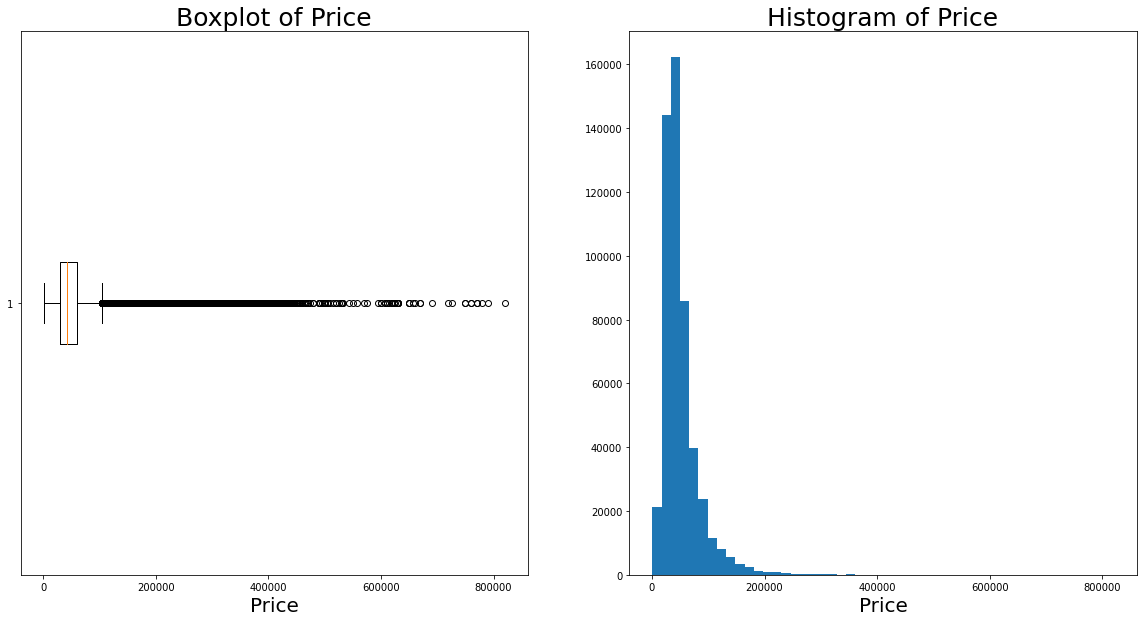

In [13]:
# 2.1 거래가격 분포 확인
firstplot=plt.figure(figsize=(20,10))
axes1=firstplot.add_subplot(1,2,1)
axes2=firstplot.add_subplot(1,2,2)

axes1.boxplot(x='price', data=data,vert=False) # 첫번째 boxplot, 가로로 눕힘
axes1.set_title('Boxplot of Price', fontsize=25) #플랏 제목, 폰트 사이즈 
axes1.set_xlabel('Price', fontsize=20) 

axes2.hist(x='price', data=data, bins=50)
axes2.set_title('Histogram of Price', fontsize=25)
axes2.set_xlabel('Price', fontsize=20)

# 플랏 해석: 아파트 거래가격이 0에서 20만 사이에 많이 분포되어 있다. 

Text(0.5, 0, 'Price')

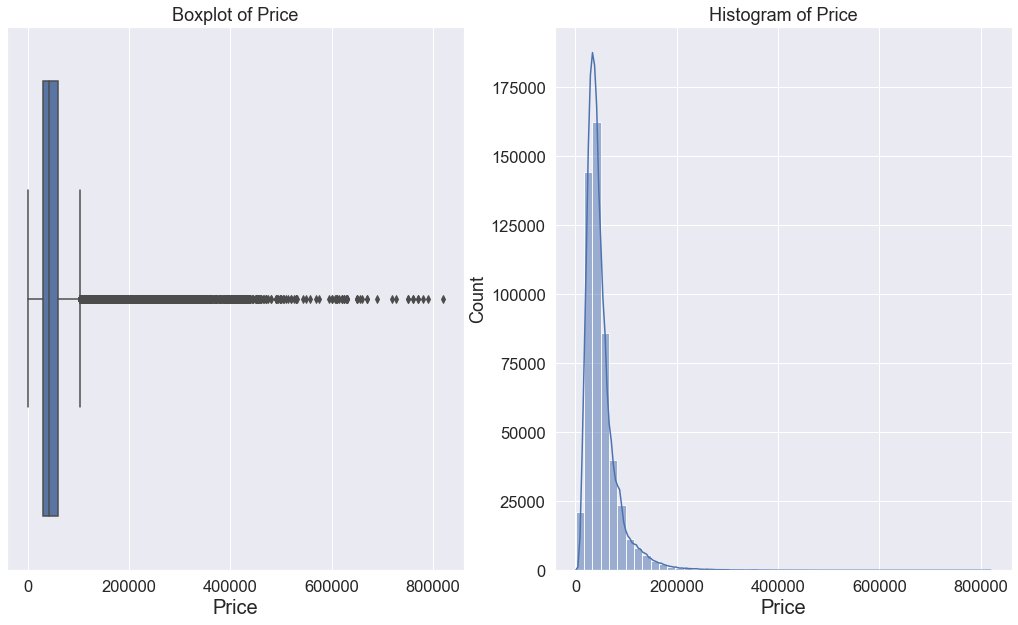

In [14]:
sns.set(font_scale=1.5)

fig,axs=plt.subplots(ncols=2, figsize=(18,10))

sns.boxplot(ax=axs[0], x='price', data=data)
sns.histplot(ax=axs[1], x='price', data=data, bins=50, kde=True)

axs[0].set_title('Boxplot of Price')
axs[0].set_xlabel('Price',fontsize=20)

axs[1].set_title('Histogram of Price')
axs[1].set_xlabel('Price',fontsize=20)

<AxesSubplot:xlabel='transaction_year', ylabel='price'>

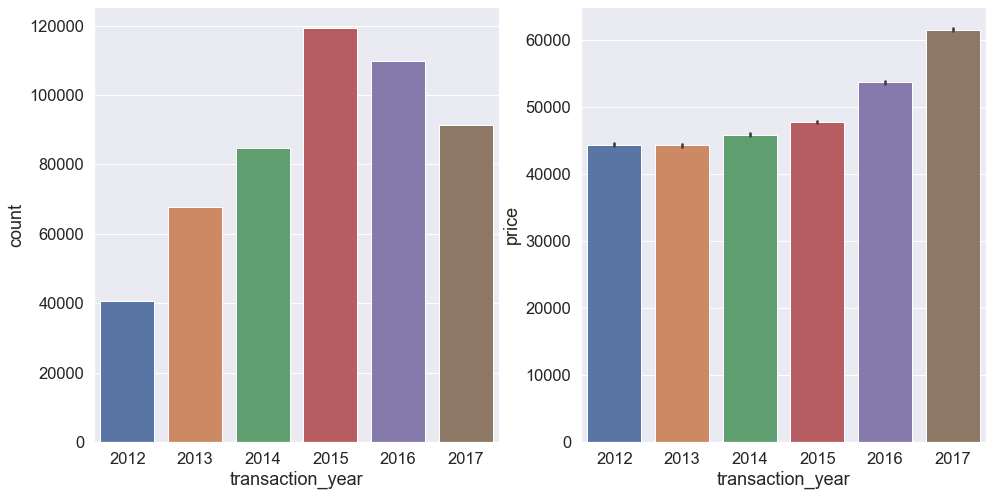

In [15]:
# 2.2 거래연도 분포 확인 / 거래연도별 가격 분포 확인
fig, axes = plt.subplots(1, 2, figsize=(16,8))
sns.countplot(ax=axes[0], x='transaction_year', data=data)
sns.barplot(ax=axes[1], x='transaction_year', y='price', data=data)

# 거래 횟수는 2015년에 가장 활발히 일어났고, 2012년에 가장 적다.
# 2017년에 거래 가격이 가장 높고, 2012년과 2013년의 거래 가격이 가장 낮다.

[]

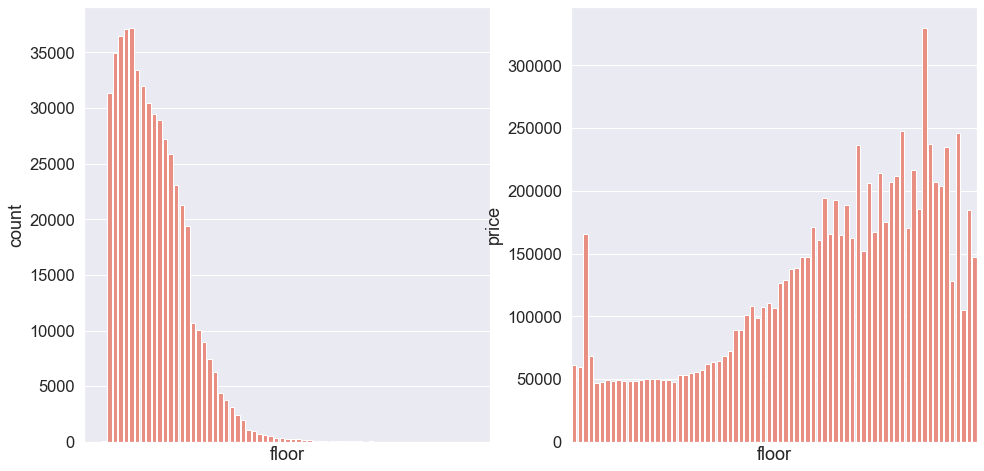

In [16]:
# 2.3 층 분포 확인 / 층별 가격 분포 확인
fig, axes = plt.subplots(1, 2, figsize=(16,8))
sns.countplot(ax=axes[0], x='floor', data=data, color='salmon')
sns.barplot(ax=axes[1], x='floor', y='price', ci=None, data=data, color='salmon')

axes[0].xaxis.set_ticks([])
axes[1].xaxis.set_ticks([])

# 층이 높을 수록 거래 가격이 높게 측정되었다.
# 저층에서는 3층의 거래 가격이 가장 높다.
# 비교적 낮은 층의거래 횟수가 잦다.

[]

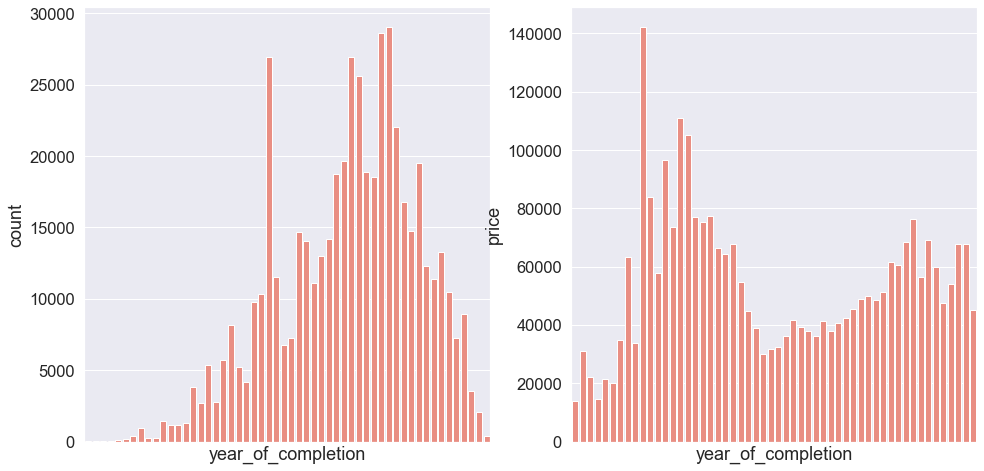

In [17]:
# 2.4 완공연도 분포 확인 / 완공연도별 가격 분포 확인
fig, axes = plt.subplots(1, 2, figsize=(16,8))
sns.countplot(ax=axes[0], x='year_of_completion', data=data, color='salmon')
sns.barplot(ax=axes[1], x='year_of_completion', y='price', ci=None, data=data, color='salmon')

axes[0].xaxis.set_ticks([])
axes[1].xaxis.set_ticks([])

# 중반 시기에 완공된 아파트들이 많기에 가격 분포는 가장 낮다.
# 초반 시기에 완공된 아파트들의 가격이 대체적으로 높게 책정되었다. 

[]

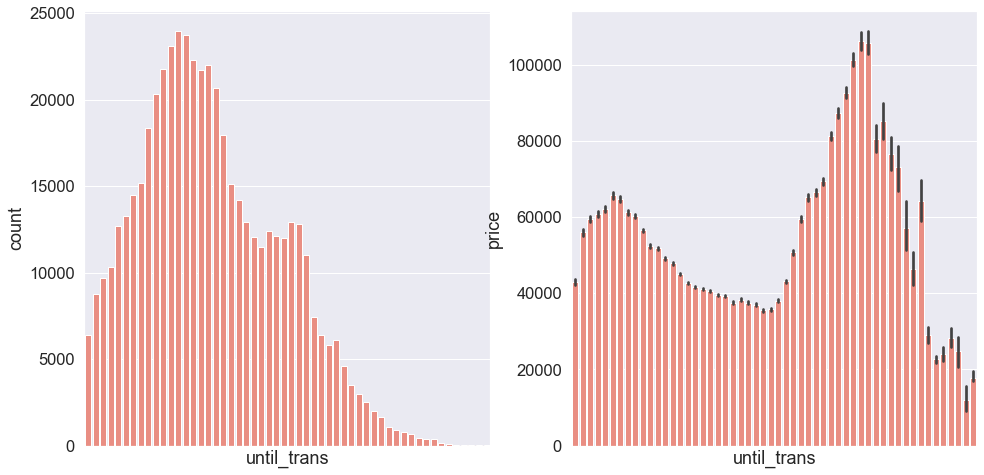

In [18]:
# 3.1 아파트 연차 변수 생성
data['until_trans']=data['transaction_year']-data['year_of_completion']

fig, axes = plt.subplots(1, 2, figsize=(16,8))
sns.countplot(ax=axes[0], x='until_trans', data=data, color='salmon')
sns.barplot(ax=axes[1], x='until_trans', y='price', data=data, color='salmon')

axes[0].xaxis.set_ticks([])
axes[1].xaxis.set_ticks([])

# 중반 이후 후반 이전 연차의 거래 가격이 가장 높게 분포되어있다.
# 연차가 오래될수록 거래 가격이 낮지만은 않다. 
# 앞서 살펴본 것처럼, 중반 연차의 거래 가격이 가장 낮다.
# 연차가 낮은 아파트의 거래 횟수가 많다. 

In [19]:
# 3.2 거래 일 변수 변환
data['transaction_date']=data['transaction_date'].astype(str)
data['transaction_date']=np.where(data['transaction_date']=='1~10', '0', (np.where(data['transaction_date']=='11~20', '1','2')))
print(data)

       dong              apt                addr_kr  exclusive_use_area  \
0       사직동  광화문풍림스페이스본(9-0)  사직동 9 광화문풍림스페이스본(9-0)               95.88   
1       사직동  광화문풍림스페이스본(9-0)  사직동 9 광화문풍림스페이스본(9-0)              108.55   
2       사직동  광화문풍림스페이스본(9-0)  사직동 9 광화문풍림스페이스본(9-0)               94.51   
3       수송동         로얄팰리스스위트        수송동 85 로얄팰리스스위트               42.87   
4       수송동         로얄팰리스스위트        수송동 85 로얄팰리스스위트               39.67   
...     ...              ...                    ...                 ...   
513523  강일동        고덕리엔파크2단지      강일동 717 고덕리엔파크2단지               59.72   
513524  강일동        강일리버파크3단지      강일동 674 강일리버파크3단지               59.87   
513525  강일동        강일리버파크3단지      강일동 674 강일리버파크3단지               84.74   
513526  강일동        강일리버파크1단지      강일동 665 강일리버파크1단지               84.74   
513527  강일동        고덕리엔파크2단지      강일동 717 고덕리엔파크2단지               84.98   

        year_of_completion transaction_year_month transaction_date  floor  \
0                     

In [20]:
# 3.3 월 변수와 10일 단위 변수 통합
data['transaction_date']=data['transaction_date'].astype(int)
data['transaction_month_date']=data['transaction_month']*3 + data['transaction_date']
data[['transaction_month_date', 'transaction_month', 'transaction_date']]

,transaction_month_date,transaction_month,transaction_date
0,3,1,0
1,4,1,1
2,4,1,1
3,3,1,0
4,5,1,2
...,...,...,...
513523,34,11,1
513524,35,11,2
513525,35,11,2
513526,35,11,2


In [21]:
# 3.4 연도별 주기성을 위한 파생변수 생성 (삼각변환)
import math
data['sin_date'] = np.sin(2*np.pi*data.transaction_month_date/4)
data['cos_date'] = np.cos(2*np.pi*data.transaction_month_date/4)

data.drop(columns=['year_of_completion','transaction_year_month','transaction_date','transaction_month','transaction_month_date'],inplace=True)
data.head()

,dong,apt,addr_kr,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,6,70000,2012,4,-1.000000e+00,-1.836970e-16
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,11,100500,2012,4,-2.449294e-16,1.000000e+00
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,1,65800,2012,4,-2.449294e-16,1.000000e+00
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,8,30500,2012,7,-1.000000e+00,-1.836970e-16
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,15,30500,2012,7,1.000000e+00,3.061617e-16


In [22]:
# 3.5 삼각변환을 통한 장점
# cyclical한 데이터를 다루기 좋다. (예. 시간이나 생태계 순환 특징, 공간적 특징-위도, 궤도)

In [23]:
# 4.1 아파트 이름 한글 부분만 뽑기
data['apt']=data['apt'].str.replace(pat=r'[^\w]', repl=r'', regex=True)
data['apt']=data['apt'].str.replace('\d+','')
data['apt']=data['apt'].str.replace(pat='[a-zA-z]', repl=r'', regex=True)
data['apt']=data['apt'].str.replace(pat='Ⅲ', repl=r'', regex=True)
data.head()

<ipython-input-23-a634cf130909>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['apt']=data['apt'].str.replace('\d+','')


,dong,apt,addr_kr,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본,사직동 9 광화문풍림스페이스본(9-0),95.88,6,70000,2012,4,-1.000000e+00,-1.836970e-16
1,사직동,광화문풍림스페이스본,사직동 9 광화문풍림스페이스본(9-0),108.55,11,100500,2012,4,-2.449294e-16,1.000000e+00
2,사직동,광화문풍림스페이스본,사직동 9 광화문풍림스페이스본(9-0),94.51,1,65800,2012,4,-2.449294e-16,1.000000e+00
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,8,30500,2012,7,-1.000000e+00,-1.836970e-16
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,15,30500,2012,7,1.000000e+00,3.061617e-16


In [24]:
# 4.2 아파트 이름 DTM
from sklearn.feature_extraction.text import CountVectorizer

vect=CountVectorizer(min_df=5)
X=vect.fit_transform(data['apt'])
name=vect.get_feature_names()
doc=X[0].toarray()
[w 
 for w, c 
 in zip(name,doc.flat)
 if c>0]
count=X.sum(axis=0)
name_count=list(zip(name, count.flat))
name_count

[('가락금호아파트', 454),
 ('가락미륭아파트', 168),
 ('가락삼익맨숀', 238),
 ('가락스타클래스', 36),
 ('가락쌍용차', 206),
 ('가락우성', 62),
 ('가락차쌍용스윗닷홈동', 28),
 ('가락차쌍용스윗닷홈동동', 46),
 ('가락차쌍용아파트', 994),
 ('가락현대투웰브동', 14),
 ('가람', 112),
 ('가람빌라', 7),
 ('가산양우내안에애플', 76),
 ('가산지웰에스테이트', 90),
 ('가야써니빌', 24),
 ('가양강나루현대', 323),
 ('가양단지', 779),
 ('가양단지성지', 821),
 ('가양도시개발단지', 453),
 ('가양우성', 154),
 ('가양차보람더하임', 46),
 ('가우디캐슬', 6),
 ('각산', 25),
 ('갈현건영', 55),
 ('갈현단지편한세상', 118),
 ('갈현동현대', 111),
 ('갈현삼성', 9),
 ('갈현현대', 143),
 ('갑을', 108),
 ('갑을명가', 84),
 ('강국', 7),
 ('강나루현대', 54),
 ('강남', 369),
 ('강남더샵포레스트', 6),
 ('강남데시앙파크', 176),
 ('강남데시앙포레', 211),
 ('강남상가', 28),
 ('강남서해더블루', 49),
 ('강남아르젠', 5),
 ('강남엘에이치단지', 149),
 ('강남역우정에쉐르', 15),
 ('강남역푸르지오시티', 34),
 ('강남태영데시앙루브', 24),
 ('강남한솔', 5),
 ('강남한신휴플러스단지', 32),
 ('강남한양수자인단지', 231),
 ('강동', 5),
 ('강동네스빌', 11),
 ('강동렘브란트', 30),
 ('강동상떼빌', 50),
 ('강동역두산위브센티움', 94),
 ('강동역신동아파밀리에', 19),
 ('강동역에스케이허브', 76),
 ('강동와이시티', 36),
 ('강동이루미', 22),
 ('강동자이', 219),
 ('강동큐브', 20),
 ('강동큐브차', 55

In [25]:
# 4.3 아파트 이름 ti-idf
from sklearn.feature_extraction.text import TfidfVectorizer

vect=TfidfVectorizer(min_df=5)
Y=vect.fit_transform(data['apt'])
name=vect.get_feature_names()
doc=Y[0].toarray()
[w 
 for w, c 
 in zip(name,doc.flat)
 if c>0]
count=Y.sum(axis=0)
name_count=list(zip(name, count.flat))
name_count

[('가락금호아파트', 454.0),
 ('가락미륭아파트', 168.0),
 ('가락삼익맨숀', 238.0),
 ('가락스타클래스', 36.0),
 ('가락쌍용차', 206.0),
 ('가락우성', 62.0),
 ('가락차쌍용스윗닷홈동', 28.0),
 ('가락차쌍용스윗닷홈동동', 46.0),
 ('가락차쌍용아파트', 994.0),
 ('가락현대투웰브동', 14.0),
 ('가람', 112.0),
 ('가람빌라', 7.0),
 ('가산양우내안에애플', 76.0),
 ('가산지웰에스테이트', 90.0),
 ('가야써니빌', 24.0),
 ('가양강나루현대', 323.0),
 ('가양단지', 779.0),
 ('가양단지성지', 821.0),
 ('가양도시개발단지', 453.0),
 ('가양우성', 154.0),
 ('가양차보람더하임', 46.0),
 ('가우디캐슬', 6.0),
 ('각산', 25.0),
 ('갈현건영', 55.0),
 ('갈현단지편한세상', 118.0),
 ('갈현동현대', 111.0),
 ('갈현삼성', 9.0),
 ('갈현현대', 143.0),
 ('갑을', 108.0),
 ('갑을명가', 84.0),
 ('강국', 7.0),
 ('강나루현대', 54.0),
 ('강남', 369.0),
 ('강남더샵포레스트', 6.0),
 ('강남데시앙파크', 176.0),
 ('강남데시앙포레', 211.0),
 ('강남상가', 28.0),
 ('강남서해더블루', 49.0),
 ('강남아르젠', 5.0),
 ('강남엘에이치단지', 149.0),
 ('강남역우정에쉐르', 15.0),
 ('강남역푸르지오시티', 34.0),
 ('강남태영데시앙루브', 24.0),
 ('강남한솔', 5.0),
 ('강남한신휴플러스단지', 32.0),
 ('강남한양수자인단지', 231.0),
 ('강동', 5.0),
 ('강동네스빌', 11.0),
 ('강동렘브란트', 30.0),
 ('강동상떼빌', 50.0),
 ('강동역두산위브센티움', 94.0),
 ('강동역신동아파밀리에', 

In [26]:
# 4.4 질문
# 아파트 이름 옆에 숫자가 함께 있어서 오류가 발생할 수 있으니, 해당 숫자만 추출하여 새로운 colum을 생성해 추가해준다.

In [27]:
# 5 
data=data.drop(columns=['addr_kr'])

In [28]:
# 5.1 원핫 인코딩
data_onehot=pd.get_dummies(data.set_index('dong')['apt'].astype(str)).max(level=0).sort_index() 
data_onehot
# 이름 변수들이 워낙 많아 필요한 공간이 커지게 되어 적절하지 않은 듯 하다.

,,가락그랑밸리,가락금호아파트,가락미륭아파트,가락삼익맨숀,가락스타클래스,가락쌍용차,가락우성,가락차쌍용스윗닷홈동,가락차쌍용스윗닷홈동동,...,힐캐슬,힐타운,힐타워,힐탑,힐탑아파트차,힐탑이루미,힐탑트레져동,힐튼,힐튼빌리지차,힐하우스
dong,,,,,,,,,,,,,,,,,,,,,
가락동,0,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
가리봉동,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가산동,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가양동,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
갈월동,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
효창동,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
후암동,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
휘경동,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# 5.2 레이블 인코딩 -transation_year
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['transaction_year']=le.fit_transform(data['transaction_year'])
data.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본,95.88,6,70000,0,4,-1.000000e+00,-1.836970e-16
1,사직동,광화문풍림스페이스본,108.55,11,100500,0,4,-2.449294e-16,1.000000e+00
2,사직동,광화문풍림스페이스본,94.51,1,65800,0,4,-2.449294e-16,1.000000e+00
3,수송동,로얄팰리스스위트,42.87,8,30500,0,7,-1.000000e+00,-1.836970e-16
4,수송동,로얄팰리스스위트,39.67,15,30500,0,7,1.000000e+00,3.061617e-16


In [39]:
# 5.3 레이블 인코딩
data_label = data
data_label['dong']=le.fit_transform(data_label['dong'])
data_label['apt']=le.fit_transform(data_label['apt'])
data_label.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,130,324,95.88,6,70000,0,4,-1.000000e+00,-1.836970e-16
1,130,324,108.55,11,100500,0,4,-2.449294e-16,1.000000e+00
2,130,324,94.51,1,65800,0,4,-2.449294e-16,1.000000e+00
3,164,1319,42.87,8,30500,0,7,-1.000000e+00,-1.836970e-16
4,164,1319,39.67,15,30500,0,7,1.000000e+00,3.061617e-16


In [38]:
# 5.4 mean encoding
data_mean=data.groupby('apt')['price'].mean()
data_mean.head()
# mean이라는 수치가 드러나있기 때문에, 아파트 이름이나 동을 한번에 알아보기 어렵다.

apt
0    33261.113208
1    36000.000000
2    52672.026432
3    44523.511905
4    69766.806723
Name: price, dtype: float64